# Import Packages

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json"
df = pd.read_json(url)

# Load json data from Italian COVID-19 repository

In [3]:
%run utility.py

In [4]:
regionalCodes = np.unique(df['codice_regione'])
regionNames = {rc: getRegionName(df, rc)  for rc in regionalCodes}

# Build SIR Model (using a Network)

In [5]:
%run SIRmodel.py

# Network Parameters (default)

In [6]:
N=100 #num Nodes
p_edges = 10/N #prob to add an edge (in network construction)
startingNodes = 'Central' #how to add arcs
percI0 = 1/N #percentage of infections (at the beginning)

# Model Hyperparameters

In [7]:
gamma = 0.1 #assuming 10 days as average COVID-19 disease length
beta = 0.02 #estimated as R0*gamma with R0=2
maxIteration = 273 #days from the beginning of COVID-19 outbreak in Italy to September 2020

# Lockdown and Vaccination Strategy

In [8]:
#Vaccine Availability
vaxAvailability = 1 #If 0 => no vaccination
vaxDailyIncrease = 0.002
vaxStrategy = 'Central' #=> vaccinate nodes with higher degrees (or 'Perifery')
#Lockdown
LD = False

# Plot

In [9]:
plot = True 

# Build Network 

In [10]:
net = Network("net1", N,p_edges, startingNodes, percI0, plot)

# Build Sir

In [11]:
model = SirModel('default', beta,gamma,vaxStrategy, vaxAvailability, vaxDailyIncrease, LD, plot, maxIteration)

# Run Simulation

#### Legend:
#### Blue: susceptible
#### Red: infected
#### Green: recovered
#### Yellow: vaccinated

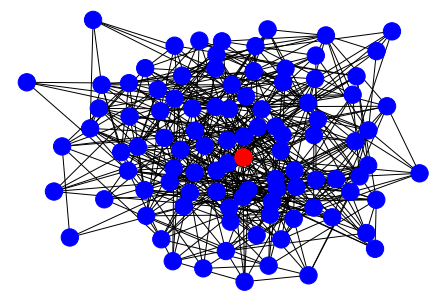

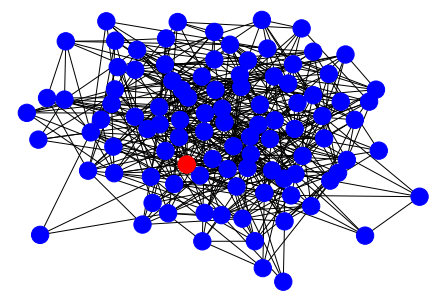

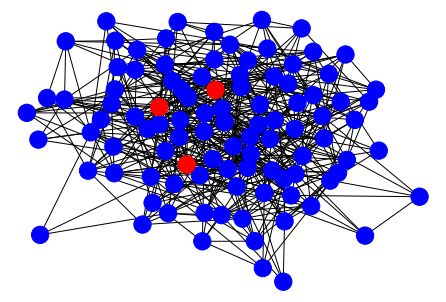

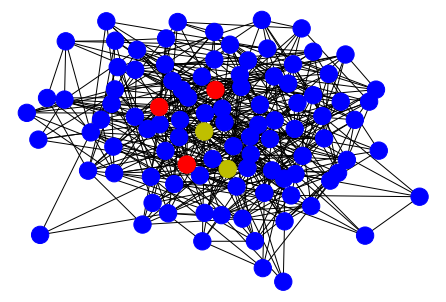

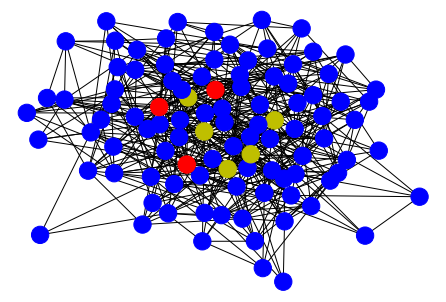

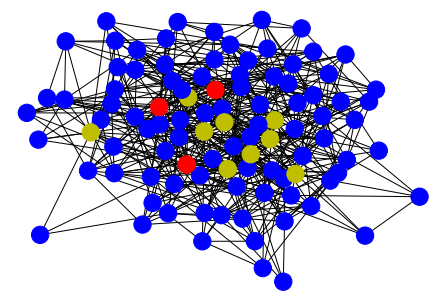

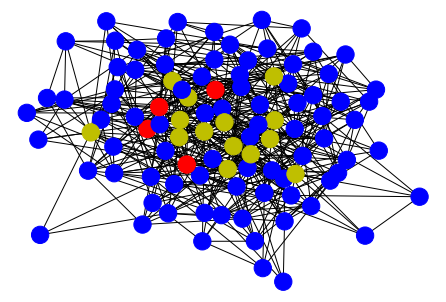

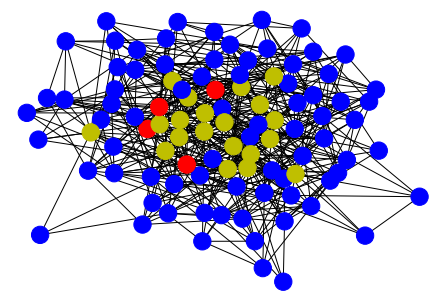

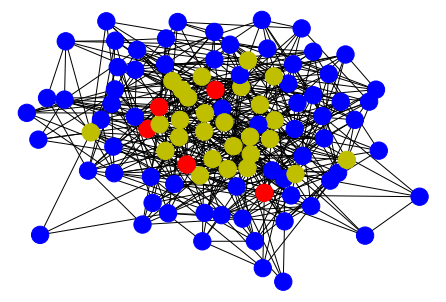

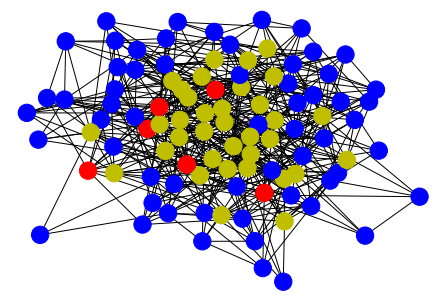

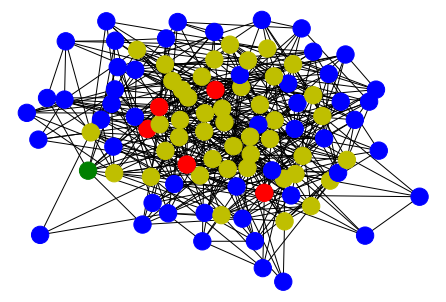

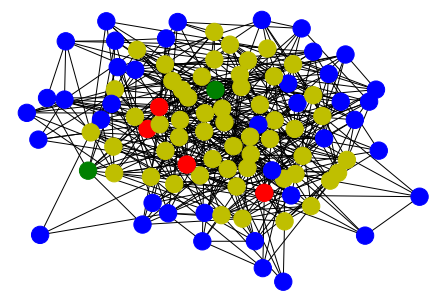

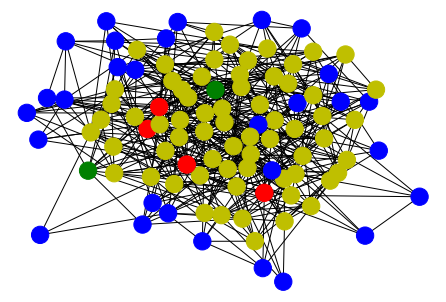

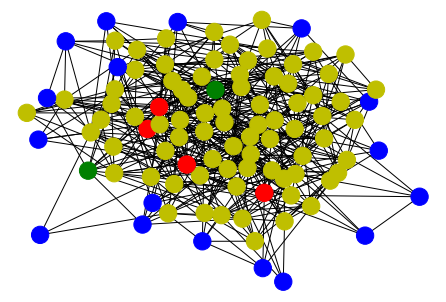

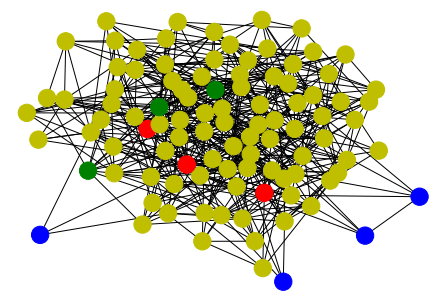

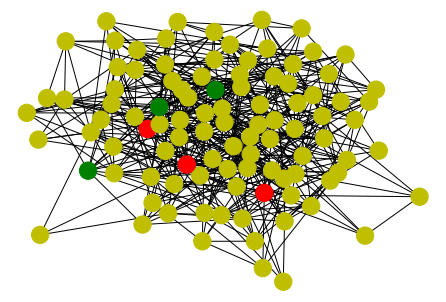

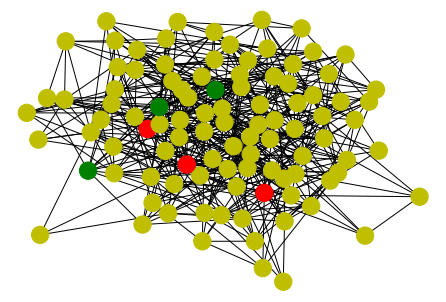

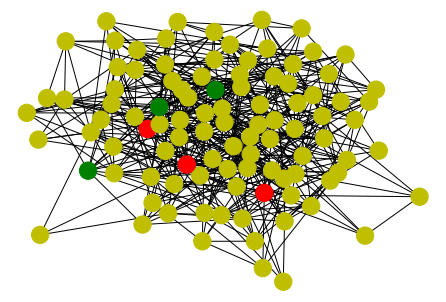

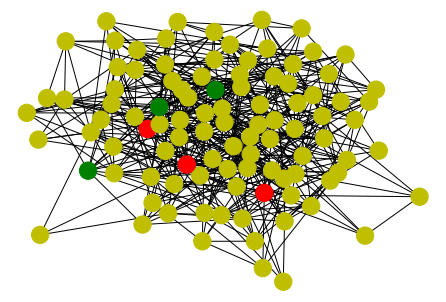

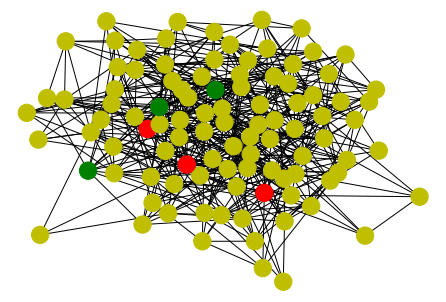

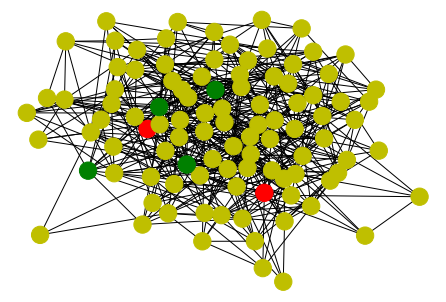

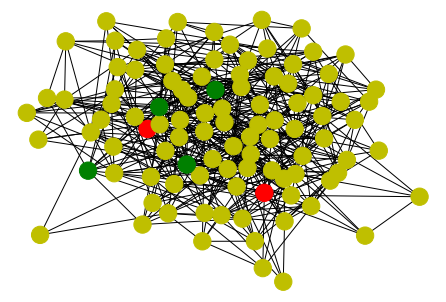

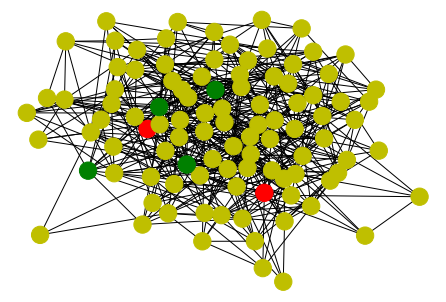

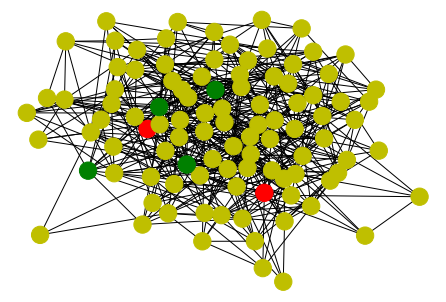

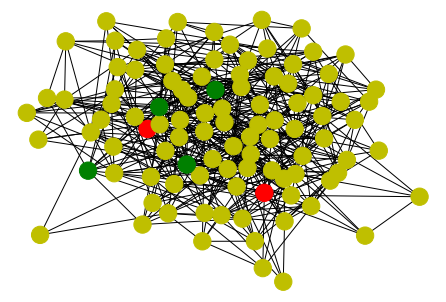

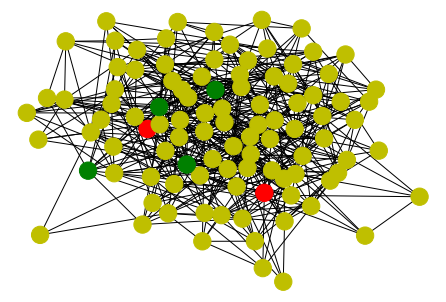

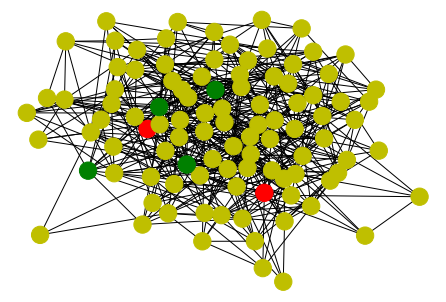

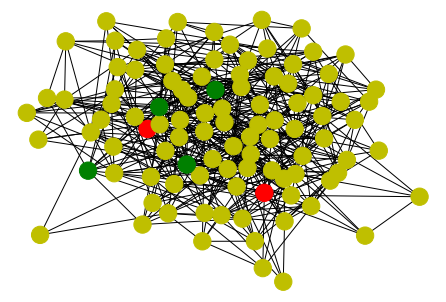

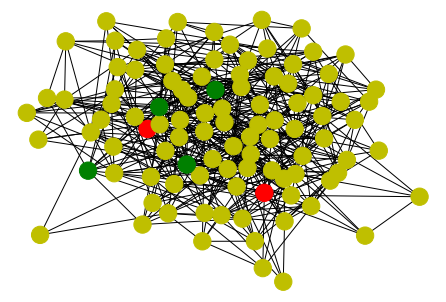

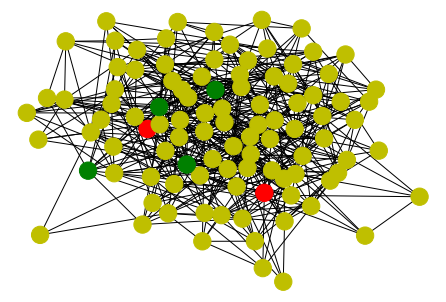

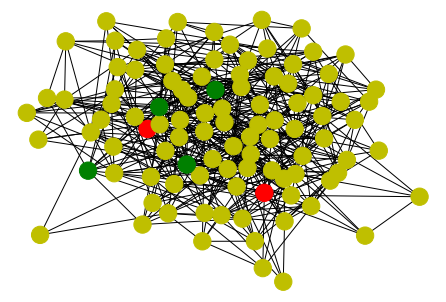

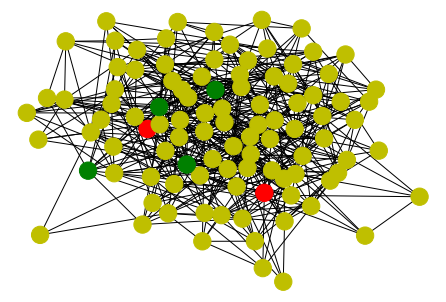

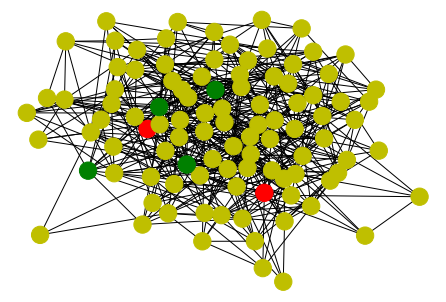

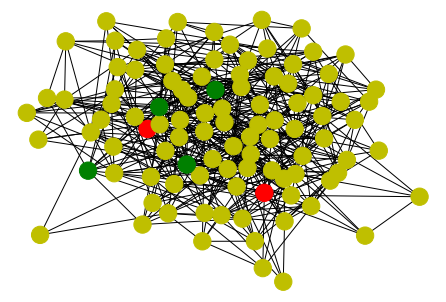

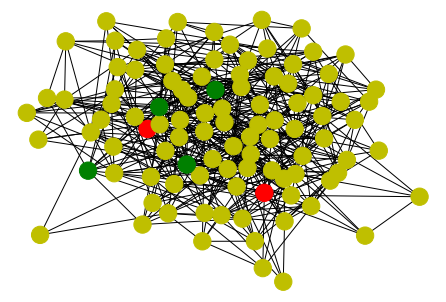

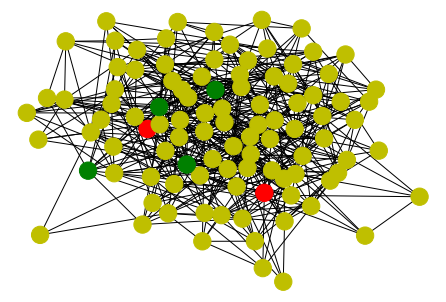

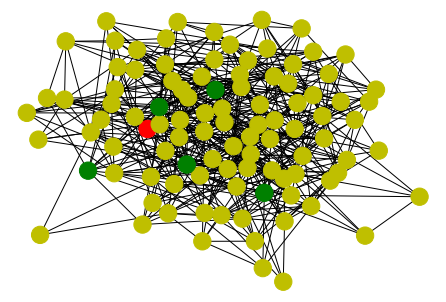

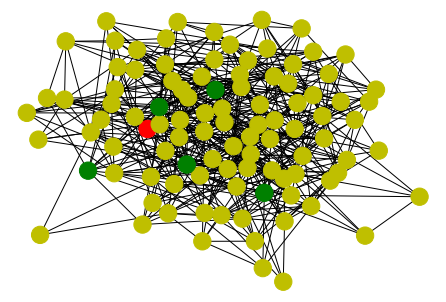

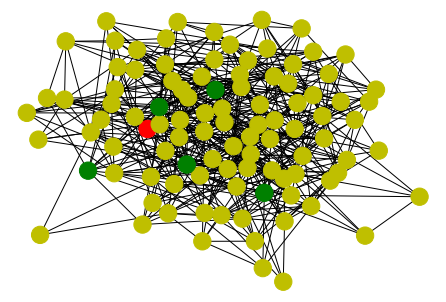

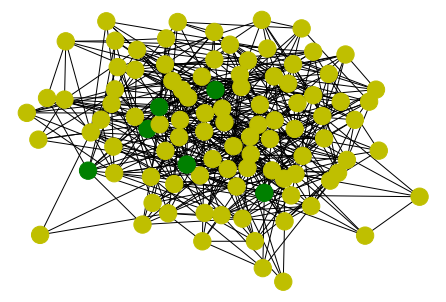

In [12]:
it, inf, cumav = covidSir(net, model)

# Fit Model to COVID-19 outbreak

# Network Parameters

In [13]:
N=50000 #num Nodes
p_edges = 10/N #prob to add an edge (in network construction)
startingNodes = 'Central' #how to add arcs
percI0 = 1/N #percentage of infections (at the beginning)

# Hyperparameters

In [14]:
gamma = 0.1 
beta = 0.02 
betalist=[0.015,0.025,0.035] #[0.005,0.015,0.025,0.035,0.045]
endTrain = 21

# Lockdown and Vaccination Strategy

In [15]:
vaxAvailability = 0
vaxDailyIncrease = 0.0
vaxStrategy = 'Central'
#Lockdown
LD = False

# Plot

In [16]:
plot = False

# Choose Italian Region

In [17]:
regionName = 'Lazio'
regionalCode = list(regionNames.keys())[list(regionNames.values()).index(regionName)]

# Run Simulation 

### The runSim function finds the best beta among those provided in betalist using the first 21 days of the first COVID-19 outbreak in Italy 

##### I suggest to skip this part [Run Simulation] (it takes several minutes)

In [18]:
%run fittingBeta.py
%run runSimulation.py
net = Network("netreal", N,p_edges, startingNodes, percI0, plot)
model = SirModel('real', beta,gamma,vaxStrategy, vaxAvailability, vaxDailyIncrease, LD, plot, endTrain)

Beta:0.015
Beta:0.025
Beta:0.035


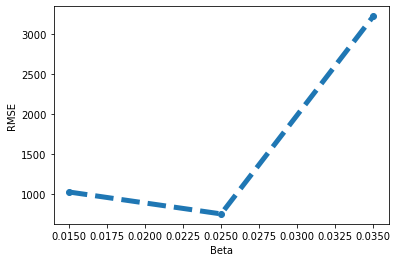

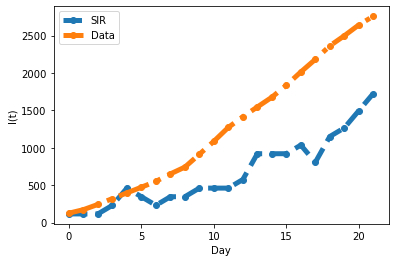

In [19]:
#Run Simulation (using real data)
SIR_res, SIR_RMSEs, beta = runSim(df, regionalCode, net, model, betalist)

# Test on second COVID-19 outbreak (September-November 2020)

In [22]:
start = '01/09/20 17:00:00' #starting second outbreak
end = '01/11/20 17:00:00' #peak second outbreak
plot = False
vaxAvailability = 0
LD = False
endTrain = 61
beta = 0.015 #beta #setting beta computed during the spring outbreak (set beta to 0.015 if you skipped the previous part)
net = Network("netreal", N,p_edges, startingNodes, percI0, plot)
model = SirModel('real', beta,gamma,vaxStrategy, vaxAvailability, vaxDailyIncrease, LD, plot, endTrain)


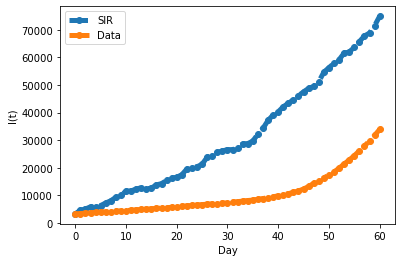

In [23]:
rmse, res, data = runSecondWave(df, start, end, regionalCode, net, model)

# Test Lockdown Measures

# Lockdown Measures (September - March) 

#### Since the effects of lockdown measures is difficult to estimate, it is possible to "play" with function lockdownReductions() [available in fitBeta.py] to analyse what happens with different interactions reductions and beta variations.

#### Time consuming (it takes at least 30 mins)

In [24]:
plot = False
percI0 = 1/N
beta = 0.015
vaxAvailability = 0
LD = True
maxIter = 180
net = Network("netreal", N,p_edges, startingNodes, percI0, plot)
model = SirModel('Lock', beta,gamma,vaxStrategy, vaxAvailability, vaxDailyIncrease, LD, plot, maxIter)
start = '01/09/20 17:00:00'
end = '01/03/21 17:00:00' 


C:\Users\matte\anaconda3\lib\site-packages\epyestim\smoothen.py:40: UserWarning: window_width is recommended to be a multiple of 7 to account for weekly patterns.
  warnings.warn('window_width is recommended to be a multiple of 7 to account for weekly patterns.')


1.356353488870303
orange
1.0474419440704767
yellow
1.0351309198224294
yellow
1.0280457785569734
yellow
0.9710013316053567
yellow
1.0159863188281784
yellow
1.0020122134840743
yellow
0.9803060300605337
yellow
0.9740242347348198
yellow
0.9778049701060003
yellow
0.9437474137681287
yellow
0.9274683336464408
yellow
0.9231164758176584
yellow
0.8466313788327611
yellow
1.037309958540234
yellow
1.039107113590402
yellow
0.7929832398516361
yellow
0.7648936043213839
yellow
1.0913746600118075
yellow
1.1161072012694095
yellow
0.7845520651107377
yellow
0.7021205440710585
yellow
0.7995858960135829
yellow
0.983559036523068
yellow
0.7982618712459854
yellow


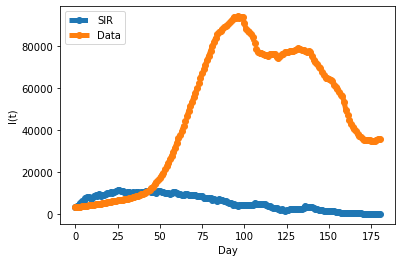

In [25]:
rmse_LDsn, res_LDsn, data = runSecondWave(df, start, end, regionalCode, net, model)

# Vaccination (March - June)

#### Time consuming (it takes at least 30 mins)

In [33]:
start = '01/03/20 17:00:00'
end = '01/06/20 17:00:00'
plot = False
percI0 = 1/N
p_edges = 10/N
beta = 0.015
vaxAvailability = 1
LD = True
maxIter = 180
vaxDailyIncrease = 0.002
net = Network("netreal", N,p_edges, startingNodes, percI0, plot)
model = SirModel('Vaccines', beta,gamma,vaxStrategy, vaxAvailability, vaxDailyIncrease, LD, plot, maxIter)


In [ ]:
rmse_LD, res_LD, data = runSecondWave(df, start, end, regionalCode, net, model)